#                               Review Comparison Hotel vs Airbnb

### Download and Import Requirements

In [18]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk 
import numpy as np
nltk.download('words')
nltk. download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")

[nltk_data] Downloading package words to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Hotel Review Analysis

## 1. Read reviews 

In [2]:
df = pd.read_csv("HotelTripAdvisor.csv", encoding = "ISO-8859-1")
df[:1]

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal stay hotel anniversary \tarrived late evening took advice previous reviews did valet parking \tcheck quick easy \tlittle disappointed non-existent view room room clean nice size \tbed comfortable woke stiff neck high pillows \tnot soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway \tmaybe just noisy neighbors \taveda bath products nice \tdid not goldfish stay nice touch taken advantage staying longer \tlocation great walking distance shopping \toverall nice experience having pay 40 parking night \t,4


## 2. Data Cleaning & Tokenization 

### a. Create function to clean text
Get rid of tabs, digits, whitespaces

In [3]:
# Remove tabs and numbers and newlines
def clean_text(text):
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    text_no_tab=re.sub(r'\t', '', text_no_doublespace)
    return text_no_doublespace


### b. Create Functions to extract Noun-Adjective Pairs, bigrams, and noun unigrams

In [4]:
stop_words = set(stopwords.words('english'))

tokenizer = nltk.RegexpTokenizer(r"\w+")

#Input a list of bigrams, extract bigrams that form a NN-JJ pair or vice versa
def extract_nn_pairs(tokenized_list):
    found="no"
    if (tokenized_list[0][1]) == 'NN' and (tokenized_list[1][1])== 'JJ':
        found="yes"
    elif (tokenized_list[1][1]) == 'NN' and (tokenized_list[0][1])== 'JJ':
        found="yes"
    return found

# Extract bigrams and join them with _
def get_bigrams(row):
    new_list=[]
    return_bigram=""
    rows=nltk.pos_tag(row)
    if (extract_nn_pairs(rows)== "yes"):
        new_list=[ str(rows[0][0]), str(rows[1][0])]
        sorted_list=sorted(new_list)
        return_bigram=sorted_list[0]+"_"+sorted_list[1]
    return return_bigram

# Get Unigrams which are Nouns
def get_nouns(row):
    new_list=[]
    return_uni=""
    rows=nltk.pos_tag(row)
    if (str(rows[0][1])=="NN"):
        return_uni=str(rows[0][0])
    elif (str(rows[0][1])=="NN"):
        return_uni=str(rows[1][0])
    return return_uni

### c. Create new columns in df

In [6]:
# Step 1: Clean the text
df['Review'] = df['Review'].apply(lambda row: clean_text(str(row)))

# Step 2: Get Bigrams
df['bigrams']=df['Review'].apply(lambda row: list(ngrams(tokenizer.tokenize(str(row)),2)  ))

# Step 3: Get NN-JJ pairs
df['bigram_list']=df['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_bigrams(i) for i in (row)])) ))

# Step 4: Get NN only
df['unigram_noun_list']=df['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_nouns(i) for i in (row)])) ))

In [27]:
df[:1]

,S.No.,Review,Rating,bigrams,bigram_list,unigram_noun_list,rating_sentiment
0,1,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night,4,"[(nice, hotel), (hotel, expensive), (expensive, parking), (parking, got), (got, good), (good, deal), (deal, stay), (stay, hotel), (hotel, anniversary), (anniversary, arrived), (arrived, late), (late, evening), (evening, took), (took, advice), (advice, previous), (previous, reviews), (reviews, did), (did, valet), (valet, parking), (parking, check), (check, quick), (quick, easy), (easy, little), (little, disappointed), (disappointed, nonexistent), (nonexistent, view), (view, room), (room, room), (room, clean), (clean, nice), (nice, size), (size, bed), (bed, comfortable), (comfortable, woke), (woke, stiff), (stiff, neck), (neck, high), (high, pillows), (pillows, not), (not, soundproof), (soundproof, like), (like, heard), (heard, music), (music, room), (room, night), (night, morning), (morning, loud), (loud, bangs), (bangs, doors), (doors, opening), (opening, closing), (closing, hear), (hear, people), (people, talking), (talking, hallway), (hallway, maybe), (maybe, just), (just, noisy), (noisy, neighbors), (neighbors, aveda), (aveda, bath), (bath, products), (products, nice), (nice, did), (did, not), (not, goldfish), (goldfish, stay), (stay, nice), (nice, touch), (touch, taken), (taken, advantage), (advantage, staying), (staying, longer), (longer, location), (location, great), (great, walking), (walking, distance), (distance, shopping), (shopping, overall), (overall, nice), (nice, experience), (experience, having), (having, pay), (pay, parking), (parking, night)]",hotel_nice expensive_hotel expensive_parking deal_good hotel_stay advice_previous easy_quick disappointed_nonexistent nonexistent_view clean_nice nice_size bed_comfortable comfortable_woke neck_stiff goldfish_stay nice_touch great_location great_walking nice_overall experience_nice,hotel parking deal hotel advice valet check view room room size bed woke soundproof heard music room night morning closing hallway bath stay touch advantage location distance experience pay,pos


## 4. Extracting Topics and Keywords
Use bigram list and TF-IDF to extract topics and keywords.

In [305]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]  
    return results

#Reference- https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.X8ubn1Mza7M

### a. Extract top n bigrams

In [ ]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(df["bigram_list"])
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["bigram_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20) 

## 3. Visualize Bigrams using Wordcloud

### Notice how people tend to talk about the comfort and services offered by the hotel. Most of the comments are related to safety,features and size of the room,bathroom. There are also comments that tend to talk about the price of the hotel in terms of expensive_parking or surgesThis price feature is not so common in Airbnb reviews. 

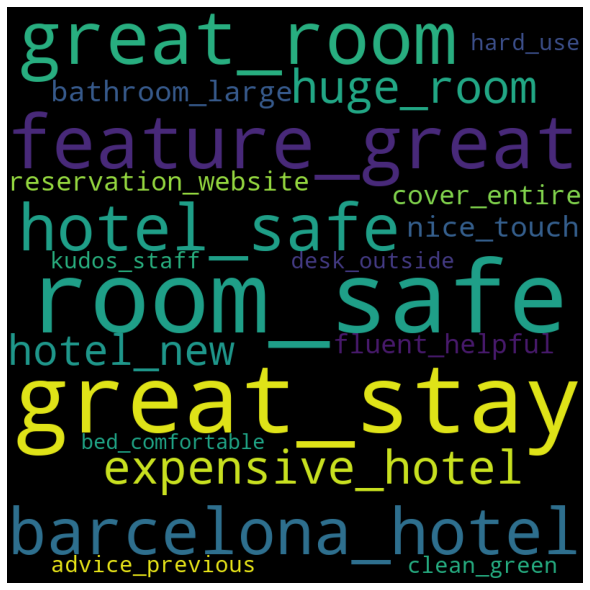

In [300]:
comment_words=""
for k in keywords:
    comment_words+=" "+str(k)
stopwords = set(STOPWORDS)        
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('hotel_review_wordcloud.png')
plt.show() 

## 5. Sentiment Classifier

### a. Using Ratings to assign sentiment and Train Classifier
We dont have sentiment labels for any of the reviews dataset but we do have ratings for Hotel Reviews. In this part we will use ratings to create a sentiment column for Hotel reviews and train our classifier on these review-sentiment. We will later use this classifier to label our Airbnb aspects.

In [12]:
def rate_sent(val):
    if val>3:
        return "pos"
    elif val<3:
        return "neg"
    else:
        return "neu"
df['rating_sentiment']=df['Rating'].apply(lambda row: rate_sent(int(row)))

### b. Train a Model for Sentimenet Classification 
We use Logistic Regression classifier and our updated hotel review dataset to train

In [13]:
#https://medium.com/dev-genius/training-an-ml-model-for-sentiment-analysis-in-python-63b6b8c68792
reviews = df['Review'].values
labels = df['rating_sentiment'].values
df.to_csv('preprocessed_airbnb.csv') 

reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)
vectorizer=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
vectorizer.fit(reviews_train)

X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/richameherwal/Desktop/Desktop-local/projects/CS_410/Final_Project/py3-env-final-proj/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the Sentiment Classifier is {}".format(accuracy))

Accuracy of the Sentiment Classifier is 0.8343498414247378


### c. (Optional- Reviewer Testing) Save and load the model 

In [15]:
from joblib import dump, load
dump(classifier, 'sentiment_analyzer.joblib') 

['sentiment_analyzer.joblib']

In [ ]:
# classifier = load('sentiment_analyzer.joblib')
# classifier.predict(X)

## 6. Plot sentiment and aspects
Visualize Keyword Topics, Sentiment and their importance

### a. Run TF-IDF on nouns
These noun will be our aspects

In [ ]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(df["unigram_noun_list"])

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["unigram_noun_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,100)
#generate tf-idf for the given document

### b. Attach sentiment to each aspect

In [259]:
list_outer=[]
for k in keywords:
    list_inner=[]
    X_new = vectorizer.transform([" ".join(k.split("_"))])
    list_inner.append(" ".join(k.split("_")))
    list_inner.append(str(classifier.predict(X_new)[0]))
    list_inner.append(keywords[k])
    list_outer.append(list_inner)

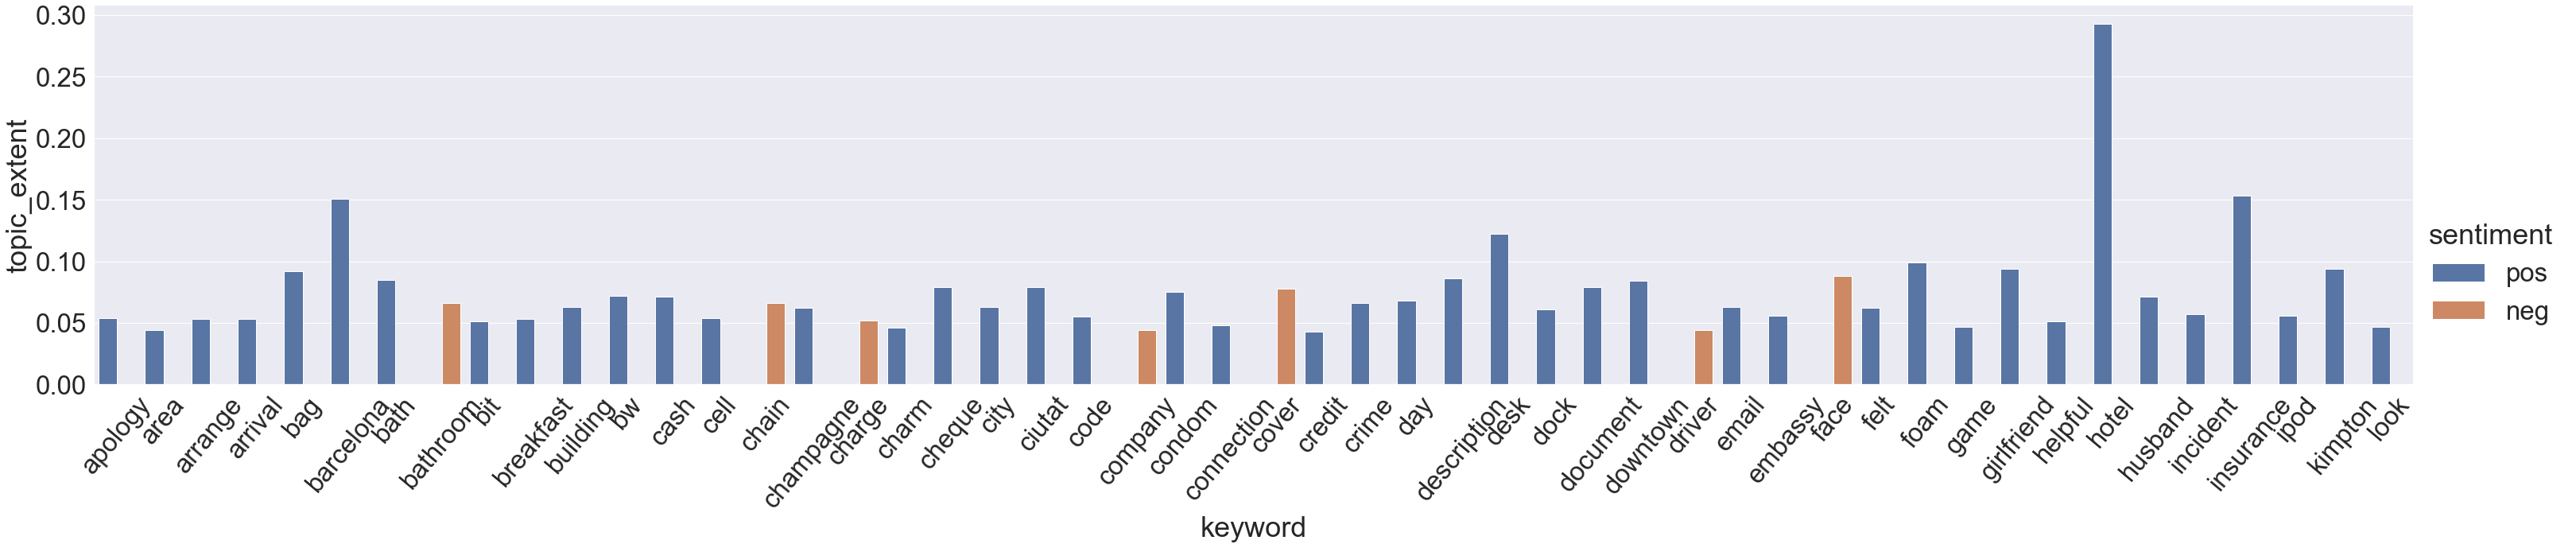

In [269]:
import seaborn as sns
from matplotlib import rcParams
sns.set(font_scale=3)
# figure size in inches
rcParams['figure.figsize'] = 300,200
my_np_array=np.array(sorted(list_outer)[:50])
my_np_array=my_np_array.reshape(50,3)
df_plot = pd.DataFrame(my_np_array, columns=['keyword','sentiment','topic_extent'])
df_plot=df_plot.astype({'topic_extent': 'float'})
plot=sns.catplot(x="keyword", y="topic_extent", hue="sentiment",kind="bar", data=df_plot, height=8.27, aspect=11.7/2.27)
plot.set_xticklabels(rotation=50)
plot.savefig("Hotel_Aspectsentiment.png")


# Airbnb Review Analysis

## 1. Read reviews 

In [208]:
import pandas as pd
df_airbnb = pd.read_csv("AirbnbReviews.csv")
df_airbnb['date'] = pd.to_datetime(df_airbnb.date)
#--Based on Last years Data
df_airbnb=df_airbnb[(df_airbnb['date'] > '2015-01-01') & (df_airbnb['date'] < '2020-01-01')]
df_airbnb=df_airbnb.drop(columns=['listing_id','id','reviewer_name','reviewer_id','date'])
df_airbnb[:1]

,comments
86,"Mai's place is very well maintenance and management. She's promptly reply and answer my questions/concerns prior or during my visit. The room itself is clean, cozy with comfy bed. It's an ideal place to stay\r\n for single or couple traveler who plan to visit Vancouver by car. I will definitely return to her place if I have to back there."


## 2. Create bigram,unigram columns in df
Reuse the same functions we used in previous dataset. Notice that airbnb reviews have stopwords, so we will need to remove that too.

In [209]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  

def remove_stopwords(tokenized_list):
    comments=""
    list_n=map(str.lower,tokenized_list)
    for w in list_n:
        if  w not in stop_words:
            comments+=" "+w
    return comments
 
df_airbnb['comments']=df_airbnb['comments'].apply(lambda row: clean_text(str(row)))  
df_airbnb['comments']=df_airbnb['comments'].apply(lambda row: remove_stopwords(word_tokenize(row)))

In [210]:
df_airbnb['bigrams']=df_airbnb['comments'].apply(lambda row: list(ngrams(tokenizer.tokenize(str(row)),2)  ))
df_airbnb['bigram_list']=df_airbnb['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_bigrams(i) for i in (row)])) ))
df_airbnb['unigram_noun_list']=df_airbnb['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_nouns(i) for i in (row)])) ))

In [244]:
df_airbnb[:2]

,comments,bigrams,bigram_list,unigram_noun_list
86,mais place well maintenance management shes promptly reply answer questionsconcerns prior visit room clean cozy comfy bed ideal place stay single couple traveler plan visit vancouver car definitely return place back,"[(mais, place), (place, well), (well, maintenance), (maintenance, management), (management, shes), (shes, promptly), (promptly, reply), (reply, answer), (answer, questionsconcerns), (questionsconcerns, prior), (prior, visit), (visit, room), (room, clean), (clean, cozy), (cozy, comfy), (comfy, bed), (bed, ideal), (ideal, place), (place, stay), (stay, single), (single, couple), (couple, traveler), (traveler, plan), (plan, visit), (visit, vancouver), (vancouver, car), (car, definitely), (definitely, return), (return, place), (place, back)]",clean_cozy ideal_place single_stay couple_single,mais place maintenance management reply answer visit room cozy comfy bed place stay couple traveler plan visit vancouver car return place
87,everything perfect clean neat nice room well equipped kitchen free laundry facilities would come back,"[(everything, perfect), (perfect, clean), (clean, neat), (neat, nice), (nice, room), (room, well), (well, equipped), (equipped, kitchen), (kitchen, free), (free, laundry), (laundry, facilities), (facilities, would), (would, come), (come, back)]",clean_perfect clean_neat nice_room free_laundry,everything room laundry


In [245]:
df_airbnb.to_csv('preprocessed_airbnb.csv') 

## 5. Extracting Topics and Keywords
Use bigram list and TF-IDF to extract topics and keywords.

In [303]:
cv=CountVectorizer(stop_words=stopwords,max_features=1000)
word_count_vector=cv.fit_transform(df_airbnb["bigram_list"])

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

feature_names=cv.get_feature_names()

tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df_airbnb["bigram_list"])]))

# sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,40)


## 6. Visualize bigrams using Wordcloud

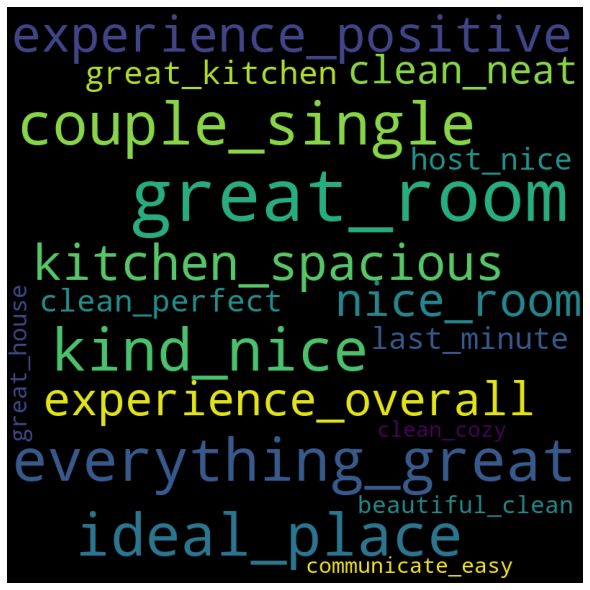

In [304]:
comment_words=""
for k in keywords:
    comment_words+=" "+str(k)
stopwords = set(STOPWORDS)        
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('airbnb_review_wordcloud.png')
plt.show() 

## 7. Plot sentiment and aspects
Visualize Keyword Topics, Sentiment and their importance

In [270]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(df_airbnb["unigram_noun_list"])
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df_airbnb["unigram_noun_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,100)
#generate tf-idf for the given document

/Users/richameherwal/Desktop/Desktop-local/projects/CS_410/Final_Project/py3-env-final-proj/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [271]:
list_outer=[]
for k in keywords:
    list_inner=[]
    X_new = vectorizer.transform([" ".join(k.split("_"))])
    list_inner.append(" ".join(k.split("_")))
    list_inner.append(str(classifier.predict(X_new)[0]))
    list_inner.append(keywords[k])
    list_outer.append(list_inner)

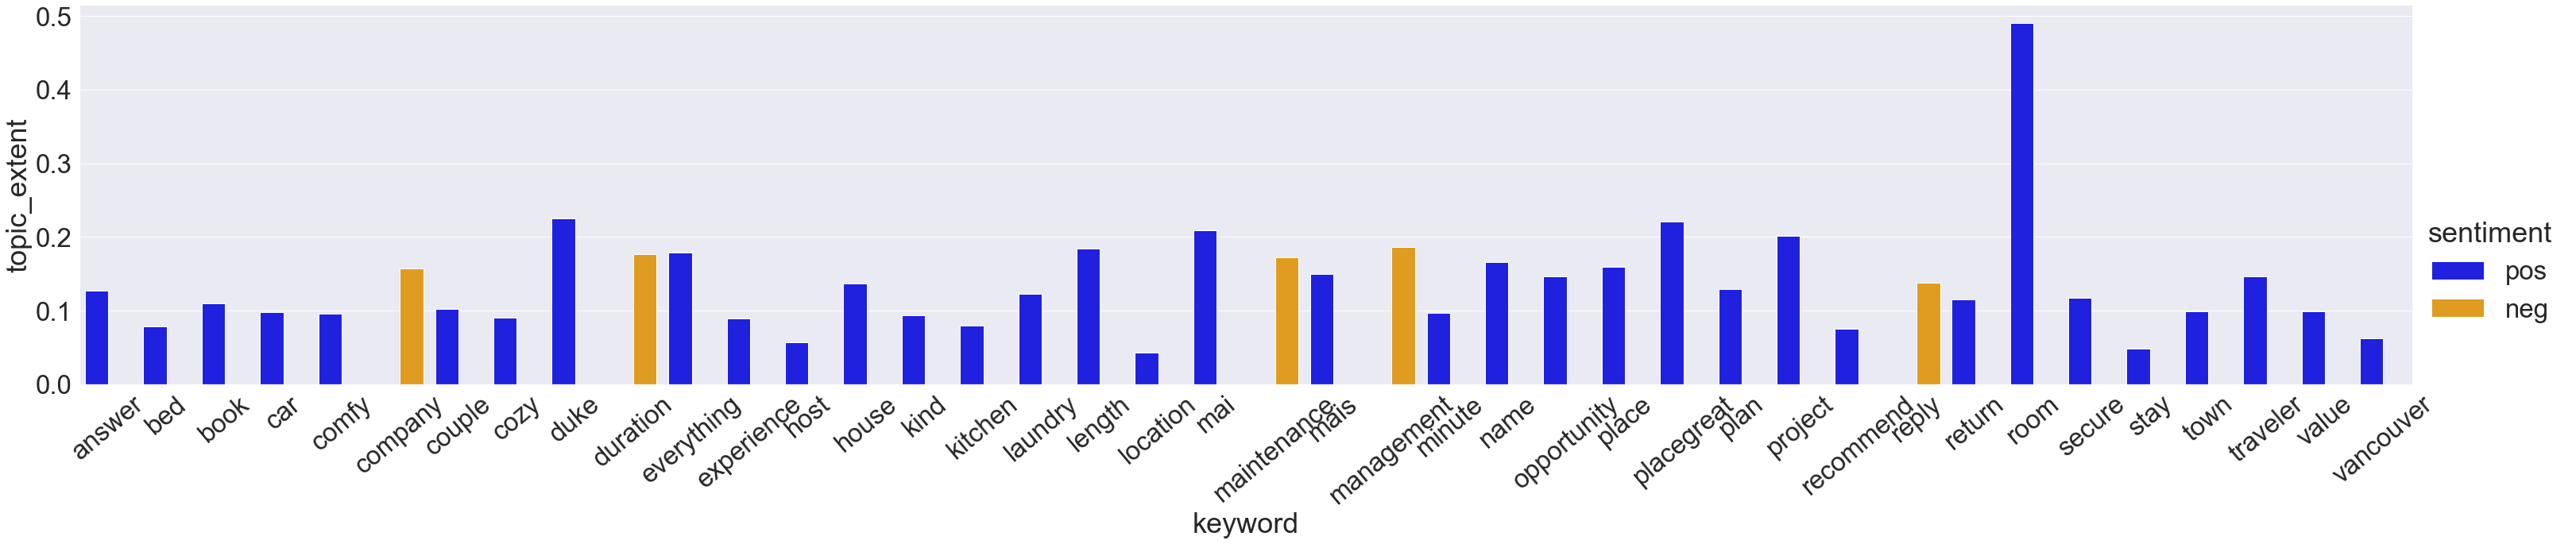

In [278]:
rcParams['figure.figsize'] = 300,200
my_np_array=np.array(sorted(list_outer)[:40])
my_np_array=my_np_array.reshape(40,3)
df_plot = pd.DataFrame(my_np_array, columns=['keyword','sentiment','topic_extent'])
df_plot=df_plot.astype({'topic_extent': 'float'})
a_plot=sns.catplot(x="keyword", y="topic_extent", hue="sentiment",kind="bar", data=df_plot, height=8.27, aspect=11.7/2.27,palette=
            sns.color_palette(['blue', 'orange']))

a_plot.set_xticklabels(rotation=40)
a_plot.savefig("Airbnb_Aspectsentiment.png")